# Problem 2: German Credit Dataset (72 points)
Given a CSV data file as represented by the sample file GermanCredit.csv (1000 records), load it into a Pandas DataFrame, and perform the following tasks on it.

## Preprocessing (31 pts)

### [8 pts] Drop the 3 columns that contribute the least to the dataset. These would be the columns with the highest number of non-zero 'none' values. Break ties by going left to right in columns. (Your code should be generalizable to drop n columns, but for the rest of the analysis, you can call your code for n=3.)

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
pddf = pd.read_csv("GermanCredit.csv") #take csv data file and read it into panda dataframe
pddf

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [2]:
def Part1(pddf, n=3): #we set n=3 but we can use any value for n
    # Count the number of non-zero 'none' values in each column
    vals = (pddf != 'none').sum()#number of 'none' vals in each col
    cols = vals.sort_values() #sort the values you get
    dropped_cols_names = cols.index[:n] #get names of least n values
    return dropped_cols_names
least_cont_vals = Part1(pddf, 3)
for i in least_cont_vals: #prints out only the columns that contribute the least
    print(i)

other_parties
other_payment_plans
own_telephone


### [4 pts] Certain values in some of the columns contain unnecessary apostrophes (‘). Remove the apostrophes.

In [3]:
pddf["checking_status"] = pddf["checking_status"].str.replace("'","")
pddf["credit_history"] = pddf["credit_history"].str.replace("'","")
pddf["purpose"] = pddf["purpose"].str.replace("'","")
pddf["savings_status"] = pddf["savings_status"].str.replace("'","")
pddf["employment"] = pddf["employment"].str.replace("'","")
pddf["personal_status"] = pddf["personal_status"].str.replace("'","")
pddf["other_parties"] = pddf["other_parties"].str.replace("'","")
pddf["property_magnitude"] = pddf["property_magnitude"].str.replace("'","")
pddf["other_payment_plans"] = pddf["other_payment_plans"].str.replace("'","")
pddf["housing"] = pddf["housing"].str.replace("'","")
pddf["job"] = pddf["job"].str.replace("'","")
pddf["own_telephone"] = pddf["own_telephone"].str.replace("'","")
pddf["foreign_worker"] = pddf["foreign_worker"].str.replace("'","")
pddf["class"] = pddf["class"].str.replace("'","")
pddf

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


### [5 pts] The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.

In [4]:
pddf["checking_status"] = pddf["checking_status"].str.replace("no checking","No Checking")
pddf["checking_status"] = pddf["checking_status"].str.replace("<0","Low")
pddf["checking_status"] = pddf["checking_status"].str.replace("0<=X<200","Medium")
pddf["checking_status"] = pddf["checking_status"].str.replace(">=200","High")
pddf

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,Low,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,No Checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,Low,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


### [5 pts] The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High').

In [5]:
pddf["savings_status"] = pddf["savings_status"].replace("no known savings","No Savings")
pddf["savings_status"] = pddf["savings_status"].replace("<100","Low")
pddf["savings_status"] = pddf["savings_status"].replace("100<=X<500","Medium")
pddf["savings_status"] = pddf["savings_status"].replace("500<=X<1000","High")
pddf["savings_status"] = pddf["savings_status"].replace(">=1000","High")
pddf

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


### [4 pts] Change class column values from 'good' to '1' and 'bad' to '0'.

In [6]:
pddf["class"] = pddf["class"].str.replace("good","1")
pddf["class"] = pddf["class"].str.replace("bad","0")
pddf

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,Low,30,existing paid,used car,3857,Low,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,0


### [5 pts] Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', depending on year range.

In [7]:
pddf["employment"] = pddf["employment"].str.replace("unemployed","Unemployed")
pddf["employment"] = pddf["employment"].str.replace("<1","Amateur")
pddf["employment"] = pddf["employment"].str.replace("1<=X<4","Professional")
pddf["employment"] = pddf["employment"].str.replace("4<=X<7","Experienced")
pddf["employment"] = pddf["employment"].str.replace(">=7","Expert")
pddf

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,No Checking,12,existing paid,furniture/equipment,1736,Low,Experienced,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,1
996,Low,30,existing paid,used car,3857,Low,Professional,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,1
997,No Checking,12,existing paid,radio/tv,804,Low,Expert,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,1
998,Low,45,existing paid,radio/tv,1845,Low,Professional,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,0


## Analysis (17 pts)

For the following tasks, do preprocessing or changing of data types in the data frame as required.

### [5 pts] Often we need to find correlations between categorical attributes, i.e. attributes that have values that fall in one of several categories, such as "yes"/"no" for attr1, or "low","medium","high" for attr2. 
One such correlation is to find counts in combinations of categorial values across attributes, as in how many instances are "yes" for attr1 and "low" for attr2. A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.

#### a. [3 pts] Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad).

In [8]:
count_workers = pd.crosstab(pddf["foreign_worker"], pddf["class"])
count_workers

class,0,1
foreign_worker,,
no,4,33
yes,296,667


#### b. [2 pts] Similarly, get the count of each category of employment for each category of saving_status.

In [9]:
count_employment = pd.crosstab(pddf["employment"],pddf["savings_status"])
count_employment

savings_status,High,Low,Medium,No Savings
employment,,,,
Amateur,12,120,17,23
Experienced,18,100,24,32
Expert,34,133,22,64
Professional,44,210,33,52
Unemployed,3,40,7,12


### [4 pts] Find the average credit_amount of single males that have 4<=X<7 years of employment. You can leave the raw result as is, no need for rounding.

In [10]:
pddf_single_males = pddf[(pddf["personal_status"] == "male single") & (pddf["employment"] == "Experienced")]
avg = pddf_single_males["credit_amount"].mean()
avg

4142.592592592592

### [4 pts] Find the average credit duration for each of the job types. You can leave the raw result as is, no need for rounding.

In [11]:
job_average = pddf.groupby("job")["duration"].mean()
job_average

job
high qualif/self emp/mgmt    25.168919
skilled                      21.411111
unemp/unskilled non res      17.363636
unskilled resident           16.535000
Name: duration, dtype: float64

### [4 pts] For the purpose 'education', what is the most common checking_status and savings_status? 
Your code should print:
    Most common checking status: ...
    Most common savings status: ...

In [12]:
pddf_education_purpose = pddf[pddf['purpose'] == 'education']
checking_status = pddf_education_purpose["checking_status"].mode().iloc[0]
savings_status = pddf_education_purpose["savings_status"].mode().iloc[0]
print("Most common checking status: " + checking_status)
print("Most common savings status: " + savings_status)

Most common checking status: No Checking
Most common savings status: Low


## Visualization (24 pts)

### [9 pts] Plot subplots of two bar charts: one for savings_status (x-axis) and the other for checking_status (x-axis). In each chart, the y-axis represents number of people. Moreover, for each category of saving_status (checking_status), we need you to display four bars, each corresponding to one of the "personal_status" categories. Each personal status category bar should be of a different color.

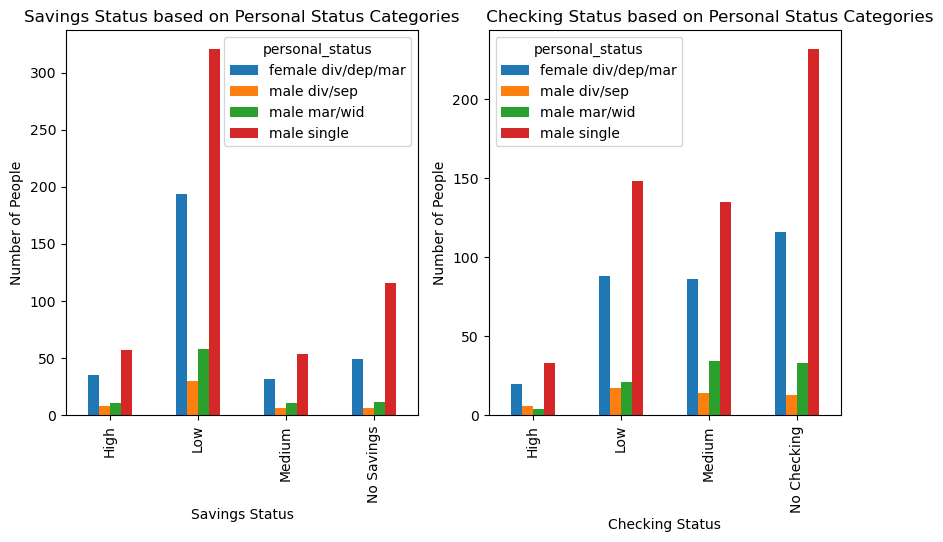

In [13]:
grouped_savings = pddf.groupby(["savings_status", "personal_status"]).size().unstack(fill_value=0)

graph, axis = plt.subplots(1, 2, figsize=(10, 5))


grouped_savings.plot(kind="bar", stacked=False, ax=axis[0])
axis[0].set_title("Savings Status based on Personal Status Categories")
axis[0].set_ylabel("Number of People")
axis[0].set_xlabel("Savings Status")

grouped_checking = pddf.groupby(["checking_status", "personal_status"]).size().unstack(fill_value=0)
grouped_checking.plot(kind="bar", stacked=False, ax=axis[1])
axis[1].set_title("                 Checking Status based on Personal Status Categories")
axis[1].set_ylabel("Number of People")
axis[1].set_xlabel("Checking Status")


plt.show()

### [9 pts] For people having credit_amount more than 4000, plot a bar graph which maps property_magnitude (x-axis) to the average customer age for that magnitude (y-axis).

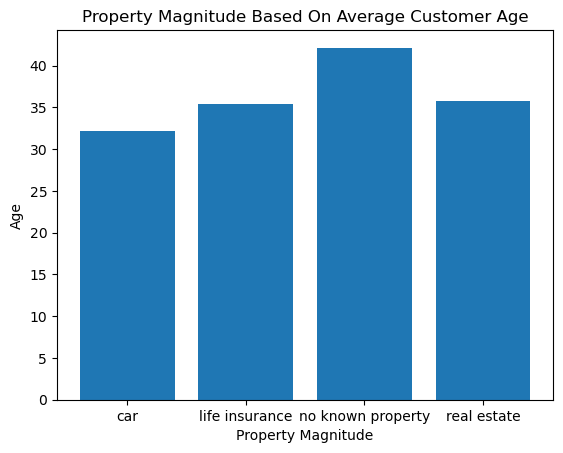

In [14]:
people_cred_above_4000 = pddf[pddf["credit_amount"] > 4000]
x = people_cred_above_4000.groupby("property_magnitude")["age"].mean()

plt.bar(x.index, x.values)
plt.title("Property Magnitude Based On Average Customer Age")
plt.xlabel("Property Magnitude")
plt.ylabel("Age")
plt.show()

### [6 pts] For people with a "High" savings_status and age above 40, use subplots to plot the following pie charts:
a. Personal status
b. Credit history
c. Job

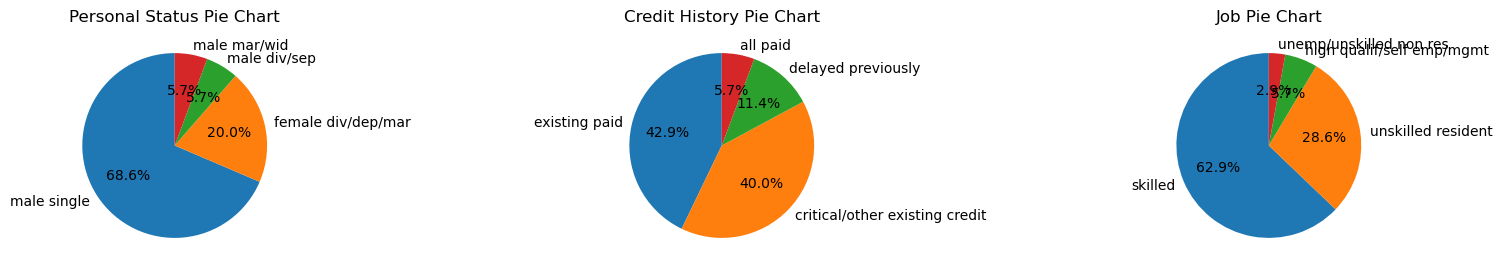

In [15]:
high_savings_status_above_40 = pddf[(pddf["savings_status"] == "High") & (pddf["age"] > 40)]
fig, axis = plt.subplots(1, 3, figsize=(20, 3))

personal_status = high_savings_status_above_40["personal_status"].value_counts()
axis[0].set_title('Personal Status Pie Chart')
axis[0].pie(personal_status, labels=personal_status.index, autopct='%1.1f%%', startangle=90)
credit_history = high_savings_status_above_40["credit_history"].value_counts()
axis[1].set_title('Credit History Pie Chart')
axis[1].pie(credit_history, labels=credit_history.index, autopct='%1.1f%%', startangle=90)

job = high_savings_status_above_40["job"].value_counts()
axis[2].set_title('Job Pie Chart')
axis[2].pie(job, labels=job.index, autopct='%1.1f%%', startangle=90)

plt.show()
